In [1]:
# !pip install sqlalchemy==1.4.7
# !pip install ibm_db_sa
# !pip install ipython-sql

In [2]:
# found panadas_profiling in a Titanic machine learning article. Had to run in Python Data environment.
import pandas as pd
from pandas_profiling import ProfileReport
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [3]:
# Load SQL using ipython-sql
# %load_ext sql

In [4]:
# import os

In [5]:
host = "localhost"
database = "Titanic_Combined_sql"
user = "postgres"
password = "@Princess21"

In [6]:
# connection_string = f"postgresql://{user}:{password}@{host}/{database}"

In [7]:
# %sql $connection_string

In [8]:
# %%sql 
# SELECT * from titanic_combined_sql LIMIT 10

In [9]:
# Import SQL into Jupyter - Module 8.5.1 code
db_string = f"postgresql://{user}:{password}@{host}/{database}"

In [10]:
engine = create_engine(db_string)

In [11]:
insp = inspect(engine)
insp.get_table_names()

['rms_titanic_passengers_and_crew',
 'rms_titanic_country_of_residency',
 'titanic',
 'titanic_survivors',
 'titanic_combined_sql',
 'filtered_data']

In [12]:
# Create a JOIN. Join 2 tables from SQL
titanic_combined = ('SELECT * FROM RMS_titanic_passengers_and_crew AS p\
                        LEFT JOIN RMS_Titanic_country_of_residency AS r\
                            ON p.index = r.mainID\
                        LEFT JOIN Titanic AS t\
                            ON p.index = t.main_key\
                        LEFT JOIN Titanic_Survivors AS s\
                            ON p.index = s.index')
result_set = engine.execute(titanic_combined)
result_set = pd.DataFrame(result_set)
result_set.head()

0                  1       2       3     4     5       6        7   \
0  435  Browne Francis M.  1880.0  1960.0  32.0  80.0    Male   Single   
1  454      Nichols Emily  1863.0     NaN  48.0   NaN  Female  Widowed   
2  459         Odell Lily  1871.0  1966.0  40.0  95.0  Female  Married   
3  465          Brewer B.  1888.0     NaN  24.0   NaN    Male     None   
4  466        Coffey John  1889.0  1957.0  23.0  68.0    Male  Married   

          8          9   ...    41    42    43  44    45    46    47    48  \
0  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
1  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
2  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
3       Crew     Engine  ...  None  None  None NaN  None  None  None  None   
4       Crew     Engine  ...  None  None  None NaN  None  None  None  None   

     49  50  
0  None NaN  
1  None NaN  
2  None NaN  
3  None NaN  
4  None NaN  

[5 rows x 51 columns]

In [13]:
# Import the data from SQL
df_titanic = pd.read_sql('SELECT * FROM titanic_combined_sql', engine)
df_titanic

index                  passenger_name    born    died   age  \
0     1000                   Cohen Gurshon  1892.0  1978.0  19.0   
1     1005                   Colgan Joseph  1879.0     NaN  33.0   
2     1007  Collett Sidney Clarence Stuart  1887.0  1941.0  25.0   
3     1009                    Collins John  1874.0  1950.0  38.0   
4     1010                    Collins John  1894.0  1941.0  17.0   
...    ...                             ...     ...     ...   ...   
2906   995             Clench George James  1881.0  1912.0  31.0   
2907   996          Clifford George Quincy  1871.0  1912.0  40.0   
2908   997                 Cochrane Robert  1867.0     NaN  44.0   
2909   998                       Coe Harry  1890.0  1912.0  21.0   
2910   999       Coelho Domingos Fernandeo  1891.0  1912.0  20.0   

      age_at_death gender marital_status   category ticket_class  ...  \
0             85.0   Male         Single  Passenger    3rd Class  ...   
1              NaN   Male           None       Crew  Victualling  ...   
2             53.0   Male         Single  Passenger    2nd Class  ...   
3             76.0   Male        Married       Crew       Engine  ...   
4             46.0   Male         Single       Crew  Victualling  ...   
...            ...    ...            ...        ...          ...  ...   
2906          31.0   Male         Single       Crew         Deck  ...   
2907          40.0   Male        Married  Passenger    1st Class  ...   
2908           NaN   Male        Married       Crew       Engine  ...   
2909          21.0   Male        Married       Crew       Engine  ...   
2910          20.0   Male         Single  Passenger    3rd Class  ...   

                       job pclass survived sibsp parch  fare  boat  body  \
0     Printer / Compositor   None      NaN   NaN   NaN   NaN  None  None   
1                 Scullion   None      NaN   NaN   NaN   NaN  None  None   
2                     None   None      NaN   NaN   NaN   NaN  None  None   
3                  Fireman   None      NaN   NaN   NaN   NaN  None  None   
4                     None   None      NaN   NaN   NaN   NaN  None  None   
...                    ...    ...      ...   ...   ...   ...   ...   ...   
2906           Able Seaman   None      NaN   NaN   NaN   NaN  None  None   
2907                  None   None      NaN   NaN   NaN   NaN  None  None   
2908                  None   None      NaN   NaN   NaN   NaN  None  None   
2909               Trimmer   None      NaN   NaN   NaN   NaN  None  None   
2910                  None      3      0.0   0.0   0.0  7.05  None  None   

     country_id2  survived_y_n  
0            359           1.0  
1            363           1.0  
2            364           1.0  
3            365           1.0  
4           None           1.0  
...          ...           ...  
2906         356           0.0  
2907        1904           0.0  
2908        None           0.0  
2909         357           0.0  
2910        None           0.0  

[2911 rows x 27 columns]

In [14]:
df_titanic = df_titanic.set_index("job_group")
df_titanic = df_titanic.drop("Californian Crew", axis =0)
df_titanic = df_titanic.drop("Carpathia Crew", axis =0)
df_titanic = df_titanic.drop("Carpathia Passengers", axis =0)
df_titanic = df_titanic.drop("Deserted", axis =0)
df_titanic = df_titanic.drop("Discharged Crew", axis =0)
df_titanic = df_titanic.drop("Failed to Join Ship", axis =0)
df_titanic = df_titanic.drop("Left Ship Sick", axis =0)
df_titanic = df_titanic.drop("Left with Consent", axis =0)
df_titanic = df_titanic.drop("Transferred", axis =0)
df_titanic = df_titanic.set_index("index")
df_titanic

passenger_name    born    died   age  age_at_death  \
index                                                                       
1000                    Cohen Gurshon  1892.0  1978.0  19.0          85.0   
1005                    Colgan Joseph  1879.0     NaN  33.0           NaN   
1007   Collett Sidney Clarence Stuart  1887.0  1941.0  25.0          53.0   
1009                     Collins John  1874.0  1950.0  38.0          76.0   
1010                     Collins John  1894.0  1941.0  17.0          46.0   
...                               ...     ...     ...   ...           ...   
995               Clench George James  1881.0  1912.0  31.0          31.0   
996            Clifford George Quincy  1871.0  1912.0  40.0          40.0   
997                   Cochrane Robert  1867.0     NaN  44.0           NaN   
998                         Coe Harry  1890.0  1912.0  21.0          21.0   
999         Coelho Domingos Fernandeo  1891.0  1912.0  20.0          20.0   

      gender marital_status   category ticket_class   ticket  ...  \
index                                                         ...   
1000    Male         Single  Passenger    3rd Class     3540  ...   
1005    Male           None       Crew  Victualling     None  ...   
1007    Male         Single  Passenger    2nd Class    28034  ...   
1009    Male        Married       Crew       Engine     None  ...   
1010    Male         Single       Crew  Victualling     None  ...   
...      ...            ...        ...          ...      ...  ...   
995     Male         Single       Crew         Deck     None  ...   
996     Male        Married  Passenger    1st Class   110465  ...   
997     Male        Married       Crew       Engine     None  ...   
998     Male        Married       Crew       Engine     None  ...   
999     Male         Single  Passenger    3rd Class  3101307  ...   

                        job pclass survived sibsp parch  fare  boat  body  \
index                                                                       
1000   Printer / Compositor   None      NaN   NaN   NaN   NaN  None  None   
1005               Scullion   None      NaN   NaN   NaN   NaN  None  None   
1007                   None   None      NaN   NaN   NaN   NaN  None  None   
1009                Fireman   None      NaN   NaN   NaN   NaN  None  None   
1010                   None   None      NaN   NaN   NaN   NaN  None  None   
...                     ...    ...      ...   ...   ...   ...   ...   ...   
995             Able Seaman   None      NaN   NaN   NaN   NaN  None  None   
996                    None   None      NaN   NaN   NaN   NaN  None  None   
997                    None   None      NaN   NaN   NaN   NaN  None  None   
998                 Trimmer   None      NaN   NaN   NaN   NaN  None  None   
999                    None      3      0.0   0.0   0.0  7.05  None  None   

       country_id2  survived_y_n  
index                             
1000           359           1.0  
1005           363           1.0  
1007           364           1.0  
1009           365           1.0  
1010          None           1.0  
...            ...           ...  
995            356           0.0  
996           1904           0.0  
997           None           0.0  
998            357           0.0  
999           None           0.0  

[2454 rows x 25 columns]

In [15]:
# Drop rows in "job_group" not part of the Titanic, ie the rescue crews and the crew members who disembarked.
# Define list of values
# drop_values = ['Californian Crew','Carpathia Crew','Carpathia Passengers','Deserted','Discharged Crew','Failed to Join Ship','Left Ship Sick','Left with Consent','Transferred']
# df_titanic[df_titanic['job_group'].str.contains('|'.join(drop_values), na=False)]


In [16]:
# df_titanic

In [17]:
# describe the data set
df_titanic.describe()

born         died          age  age_at_death    survived  \
count  2432.000000  2284.000000  2432.000000   2285.000000  639.000000   
mean   1880.446546  1925.528021    31.025082     44.312035    0.483568   
std      12.149573    21.869753    12.168965     23.070046    0.500121   
min    1837.000000  1912.000000     0.000000      0.000000    0.000000   
25%    1873.000000  1912.000000    23.000000     26.000000    0.000000   
50%    1882.000000  1912.000000    30.000000     37.000000    0.000000   
75%    1889.000000  1939.250000    39.000000     64.000000    1.000000   
max    1912.000000  2009.000000    74.000000    104.000000    1.000000   

            sibsp       parch        fare  survived_y_n  
count  639.000000  639.000000  639.000000   2454.000000  
mean     0.593114    0.525822   43.549655      0.290139  
std      0.930340    0.917715   58.804085      0.453919  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000    0.000000   10.170850      0.000000  
50%      0.000000    0.000000   26.000000      0.000000  
75%      1.000000    1.000000   52.000000      1.000000  
max      5.000000    6.000000  512.329200      1.000000

In [18]:
# Learned and read from internet reading up on the Kaggle titanic project about Exploratory Data Analysis https://www.activestate.com/blog/how-to-use-machine-learning-to-determine-titanic-survivors/. 
# This is using the panadas_profiling library.
eda_report = ProfileReport(df_titanic)
eda_report

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Initial imports. This code is directly from Module 17.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Exploring Dataset

In [20]:
# get dtypes
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454 entries, 1000 to 999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   passenger_name        2454 non-null   object 
 1   born                  2432 non-null   float64
 2   died                  2284 non-null   float64
 3   age                   2432 non-null   float64
 4   age_at_death          2285 non-null   float64
 5   gender                2454 non-null   object 
 6   marital_status        1839 non-null   object 
 7   category              2454 non-null   object 
 8   ticket_class          2453 non-null   object 
 9   ticket                1347 non-null   object 
 10  cabin                 309 non-null    object 
 11  embarked              2453 non-null   object 
 12  disembarked           957 non-null    object 
 13  country_of_residence  2036 non-null   object 
 14  profession            2036 non-null   object 
 15  job                   14

In [21]:
df_titanic[['gender', 'survived_y_n']].groupby(['gender'], as_index=False).mean()

gender  survived_y_n
0   Female      0.712302
1     Male      0.181119
2  Unknown      0.000000

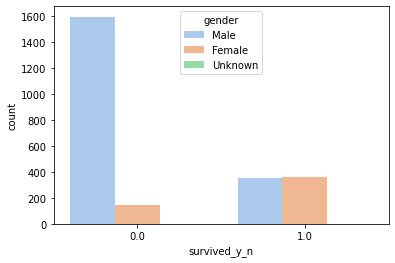

In [22]:
# number of survivors based on gender
sns.countplot(x="survived_y_n", hue = "gender", palette="pastel", data = df_titanic)
plt.show()

Text(0, 0.5, '% Survived')

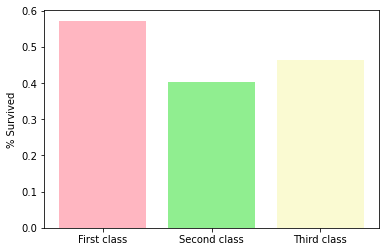

In [23]:
# trying plt.subplot found in Titanc documentation and verified on matplotlib - the base structure that is
# percentage survived by ticket class
fig, ax = plt.subplots()
pclass_count = df_titanic['pclass'].value_counts(sort=False)
survive_count = df_titanic.loc[df_titanic['survived_y_n'] == 1, ['pclass']].value_counts(sort=False)
ax.bar('First class', survive_count.iloc[0]/pclass_count.iloc[0], color='lightpink')
ax.bar('Second class', survive_count.iloc[1]/pclass_count.iloc[1], color='lightgreen')
ax.bar('Third class', survive_count.iloc[2]/pclass_count.iloc[2], color='lightgoldenrodyellow')
ax.set_ylabel('% Survived')

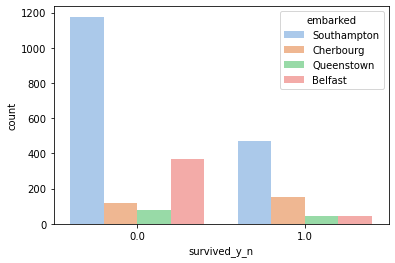

In [24]:
# number of survivors by where embarked(got on the boat)
sns.countplot(x="survived_y_n", hue = "embarked", palette="pastel", data = df_titanic)
plt.show()

In [25]:
# Age and Sex. used code from https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
# because it is cool
# survived = 'survived'
#not_survived = 'not survived'
#fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
#women = df_titanic[df_titanic['gender']=='0']
# men = df_titanic[df_titanic['gender']=='1']
#ax = sns.histplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
#ax = sns.histplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
# ax.legend()
# ax.set_titles('Female')
#ax = sns.displot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
#ax = sns.displot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
#ax.legend()
#_ = ax.set_title('Male')

In [26]:
# directly from https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot. It's super cool
# t = sns.catplot(x="who", y="survived", col="class",
#                data=titanic, saturation=.5,
#                kind="bar", ci=None, aspect=.6)
#(t.set_axis_labels("", "Survival Rate")
#  .set_xticklabels(["Men", "Women", "Children"])
#  .set_titles("{col_name} {col_var}")
#  .set(ylim=(0, 1))
#  .despine(left=True))  ")

### Preprocessing

In [28]:
# Encode the dataset - From Module 17.6.1. Set gender and embarked to numerical values
# encoded_titanic = pd.get_dummies(df_titanic, columns=["gender", "marital_status", "embarked", "ticket_class"])
# encoded_titanic.head()

In [43]:
# using LabelEncoder to transform the text into numberical data. Module 17.6.2 language
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_titanic = df_titanic.copy()
train_titanic['marital_status'] = le.fit_transform(train_titanic['marital_status'])
train_titanic['embarked'] = le.fit_transform(train_titanic['embarked'])
train_titanic['ticket_class'] = le.fit_transform(train_titanic['ticket_class'])
train_titanic['gender'] = le.fit_transform(train_titanic['gender'])
train_titanic['category'] = le.fit_transform(train_titanic['category'])
train_titanic['country_of_residence'] = le.fit_transform(train_titanic['country_of_residence'])
train_titanic.head()

passenger_name    born    died   age  age_at_death  \
index                                                                       
1000                    Cohen Gurshon  1892.0  1978.0  19.0          85.0   
1005                    Colgan Joseph  1879.0     NaN  33.0           NaN   
1007   Collett Sidney Clarence Stuart  1887.0  1941.0  25.0          53.0   
1009                     Collins John  1874.0  1950.0  38.0          76.0   
1010                     Collins John  1894.0  1941.0  17.0          46.0   

       gender  marital_status  category  ticket_class ticket  ...  \
index                                                         ...   
1000        1               3         1             2   3540  ...   
1005        1               5         0             6   None  ...   
1007        1               3         1             1  28034  ...   
1009        1               2         0             5   None  ...   
1010        1               3         0             6   None  ...   

                        job  pclass survived  sibsp parch fare  boat  body  \
index                                                                        
1000   Printer / Compositor    None      NaN    NaN   NaN  NaN  None  None   
1005               Scullion    None      NaN    NaN   NaN  NaN  None  None   
1007                   None    None      NaN    NaN   NaN  NaN  None  None   
1009                Fireman    None      NaN    NaN   NaN  NaN  None  None   
1010                   None    None      NaN    NaN   NaN  NaN  None  None   

       country_id2  survived_y_n  
index                             
1000           359           1.0  
1005           363           1.0  
1007           364           1.0  
1009           365           1.0  
1010          None           1.0  

[5 rows x 25 columns]

In [45]:
# Drop "passenger_name", "ticket", "cabin" as they do not inform survivability
train_titanic = train_titanic.drop(["boat", "born", "died","passenger_name", "ticket", "age_at_death","survived",
                                    "cabin", "disembarked", "job", "profession", "country_id2", "pclass", "body"], axis = 1)
train_titanic.head()

age  gender  marital_status  category  ticket_class  embarked  \
index                                                                   
1000   19.0       1               3         1             2         3   
1005   33.0       1               5         0             6         3   
1007   25.0       1               3         1             1         3   
1009   38.0       1               2         0             5         3   
1010   17.0       1               3         0             6         3   

       country_of_residence  sibsp  parch  fare  survived_y_n  
index                                                          
1000                     12    NaN    NaN   NaN           1.0  
1005                     12    NaN    NaN   NaN           1.0  
1007                     12    NaN    NaN   NaN           1.0  
1009                     12    NaN    NaN   NaN           1.0  
1010                     40    NaN    NaN   NaN           1.0

In [48]:
# Replaced NaN values with zeros
train_titanic = train_titanic.fillna(0)
train_titanic

age  gender  marital_status  category  ticket_class  embarked  \
index                                                                   
1000   19.0       1               3         1             2         3   
1005   33.0       1               5         0             6         3   
1007   25.0       1               3         1             1         3   
1009   38.0       1               2         0             5         3   
1010   17.0       1               3         0             6         3   
...     ...     ...             ...       ...           ...       ...   
995    31.0       1               3         0             4         3   
996    40.0       1               2         1             0         3   
997    44.0       1               2         0             5         0   
998    21.0       1               2         0             5         3   
999    20.0       1               3         1             2         3   

       country_of_residence  sibsp  parch  fare  survived_y_n  
index                                                          
1000                     12    0.0    0.0  0.00           1.0  
1005                     12    0.0    0.0  0.00           1.0  
1007                     12    0.0    0.0  0.00           1.0  
1009                     12    0.0    0.0  0.00           1.0  
1010                     40    0.0    0.0  0.00           1.0  
...                     ...    ...    ...   ...           ...  
995                      12    0.0    0.0  0.00           0.0  
996                      36    0.0    0.0  0.00           0.0  
997                      40    0.0    0.0  0.00           0.0  
998                      12    0.0    0.0  0.00           0.0  
999                      40    0.0    0.0  7.05           0.0  

[2454 rows x 11 columns]

In [49]:
# count the empty values
train_titanic.isna().sum()

age                     0
gender                  0
marital_status          0
category                0
ticket_class            0
embarked                0
country_of_residence    0
sibsp                   0
parch                   0
fare                    0
survived_y_n            0
dtype: int64

In [32]:
# Remove rows missing value. placeholder

In [50]:
train_titanic.dtypes

age                     float64
gender                    int32
marital_status            int32
category                  int32
ticket_class              int32
embarked                  int32
country_of_residence      int32
sibsp                   float64
parch                   float64
fare                    float64
survived_y_n            float64
dtype: object

In [51]:
# Scale the data in the DataFrame - Module 17.6.4 language
data_scaler = StandardScaler()
titanic_data_scaled = data_scaler.fit_transform(train_titanic)
titanic_data_scaled [:5]

array([[-0.94278422,  0.50649138, -0.09146357,  0.90282266, -0.4826381 ,
         0.65470841, -0.76128384, -0.28542936, -0.26243113, -0.31892821,
         1.56417046],
       [ 0.1808254 ,  0.50649138,  1.55891593, -1.10763724,  1.40258895,
         0.65470841, -0.76128384, -0.28542936, -0.26243113, -0.31892821,
         1.56417046],
       [-0.46123724,  0.50649138, -0.09146357,  0.90282266, -0.95394486,
         0.65470841, -0.76128384, -0.28542936, -0.26243113, -0.31892821,
         1.56417046],
       [ 0.58211456,  0.50649138, -0.91665333, -1.10763724,  0.93128219,
         0.65470841, -0.76128384, -0.28542936, -0.26243113, -0.31892821,
         1.56417046],
       [-1.10329988,  0.50649138, -0.09146357, -1.10763724,  1.40258895,
         0.65470841,  1.51908301, -0.28542936, -0.26243113, -0.31892821,
         1.56417046]])

In [52]:
titanic_data_scaled.shape

(2454, 11)

### Modeling Algorithm

In [53]:
# Preprocess the Data
# Define the features set. From Module 17.8
X = train_titanic.copy()
X = X.drop("survived_y_n", axis=1)
X.head()

age  gender  marital_status  category  ticket_class  embarked  \
index                                                                   
1000   19.0       1               3         1             2         3   
1005   33.0       1               5         0             6         3   
1007   25.0       1               3         1             1         3   
1009   38.0       1               2         0             5         3   
1010   17.0       1               3         0             6         3   

       country_of_residence  sibsp  parch  fare  
index                                            
1000                     12    0.0    0.0   0.0  
1005                     12    0.0    0.0   0.0  
1007                     12    0.0    0.0   0.0  
1009                     12    0.0    0.0   0.0  
1010                     40    0.0    0.0   0.0

In [54]:
# Define the target set. From Module 17.8.
y = train_titanic["survived_y_n"].ravel()
y

array([1., 1., 1., ..., 0., 0., 0.])

In [68]:
# Splitting into Train and Test sets. From Module 17.8.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [69]:
# Creating a StandardScaler instance. From Module 17.8.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Random Forest Classifer

In [75]:
# Create a random forest classifier. From Module 17.8.
rfc_model = RandomForestClassifier(n_estimators=500, random_state=75) 

In [76]:
# Fitting the model. From Module 17.8.
rfc_model = rfc_model.fit(X_train_scaled, y_train)

In [77]:
# Making predictions using the testing data. From Module 17.8.
predictions = rfc_model.predict(X_test_scaled)

In [78]:
print("test accuracy: ", rfc_model.score(X_train_scaled, y_train))

test accuracy:  0.9499126383226558


### Confusion Matrix

In [79]:
# Calculating the confusion matrix. From Module 17.8.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"])
cm_df

Predicted No  Predicted Yes
Actual No            455             55
Actual Yes           106            121

In [81]:
# Calculating the accuracy score. From Module 17.8.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7815468113975577

In [82]:
# Displaying results. From Module 17.8.
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted No  Predicted Yes
Actual No            455             55
Actual Yes           106            121

Accuracy Score : 0.7815468113975577
Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       510
         1.0       0.69      0.53      0.60       227

    accuracy                           0.78       737
   macro avg       0.75      0.71      0.73       737
weighted avg       0.77      0.78      0.77       737



In [83]:
# Calculate feature importance in the Random Forest model. From Module 17.8.
importances = rfc_model.feature_importances_
importances

array([0.31506184, 0.20441107, 0.07069455, 0.01095361, 0.10039323,
       0.03677542, 0.09134885, 0.02404388, 0.02924472, 0.11707281])

In [85]:
# We can sort the features by their importance. From Module 17.8.
sorted(zip(rfc_model.feature_importances_, X.columns), reverse=True)

[(0.315061838020684, 'age'),
 (0.20441107228990107, 'gender'),
 (0.11707281039128094, 'fare'),
 (0.10039322610160334, 'ticket_class'),
 (0.09134885427428613, 'country_of_residence'),
 (0.07069455315055649, 'marital_status'),
 (0.036775424032404705, 'embarked'),
 (0.029244724720084735, 'parch'),
 (0.024043882853266755, 'sibsp'),
 (0.01095361416593179, 'category')]